# Decision Tree Horse Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from warnings import filterwarnings

In [3]:
data=pd.read_csv("E:\Deep - Data Science\Online Lectures\Machine Learning\Resources\\horse.csv")
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [4]:
data.shape

(299, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [6]:
data.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [7]:
# split X and Y features
X=data.drop("outcome",axis=1)
y=data["outcome"]

In [8]:
data_num=X.select_dtypes(include=[np.number])# separate numerical datatype
data_cat=X.select_dtypes(exclude=[np.number]) # separe the object values

In [9]:
type(data_num)

pandas.core.frame.DataFrame

In [10]:
data_num.columns

Index(['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
       'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3'],
      dtype='object')

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values= np.nan , strategy = "mean")
data_num1=imp.fit_transform(data_num)
# it gives output in nd.arry

In [12]:
data_num1

array([[5.30101e+05, 3.85000e+01, 6.60000e+01, ..., 1.13000e+04,
        0.00000e+00, 0.00000e+00],
       [5.34817e+05, 3.92000e+01, 8.80000e+01, ..., 2.20800e+03,
        0.00000e+00, 0.00000e+00],
       [5.30334e+05, 3.83000e+01, 4.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [5.29386e+05, 3.75000e+01, 7.20000e+01, ..., 3.20500e+03,
        0.00000e+00, 0.00000e+00],
       [5.30612e+05, 3.65000e+01, 1.00000e+02, ..., 2.20800e+03,
        0.00000e+00, 0.00000e+00],
       [5.34618e+05, 3.72000e+01, 4.00000e+01, ..., 6.11200e+03,
        0.00000e+00, 0.00000e+00]])

In [13]:
dnum1=pd.DataFrame(data_num1,columns=data_num.columns)
dnum1.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530101.0,38.5,66.0,28.0,4.707547,45.0,8.4,3.039604,11300.0,0.0,0.0
1,534817.0,39.2,88.0,20.0,4.707547,50.0,85.0,2.000000,2208.0,0.0,0.0
2,530334.0,38.3,40.0,24.0,4.707547,33.0,6.7,3.039604,0.0,0.0,0.0
3,5290409.0,39.1,164.0,84.0,5.000000,48.0,7.2,5.300000,2208.0,0.0,0.0
4,530255.0,37.3,104.0,35.0,4.707547,74.0,7.4,3.039604,4300.0,0.0,0.0


In [14]:
# Type casting
dnum1["hospital_number"]=dnum1["hospital_number"].astype(int)
dnum1.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530101,38.5,66.0,28.0,4.707547,45.0,8.4,3.039604,11300.0,0.0,0.0
1,534817,39.2,88.0,20.0,4.707547,50.0,85.0,2.000000,2208.0,0.0,0.0
2,530334,38.3,40.0,24.0,4.707547,33.0,6.7,3.039604,0.0,0.0,0.0
3,5290409,39.1,164.0,84.0,5.000000,48.0,7.2,5.300000,2208.0,0.0,0.0
4,530255,37.3,104.0,35.0,4.707547,74.0,7.4,3.039604,4300.0,0.0,0.0


# Encoding the categorical values

In [18]:
data_cat=pd.get_dummies(data_cat)
data_cat.head()

,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_absent,peripheral_pulse_increased,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [19]:
imp1 = SimpleImputer(missing_values= np.nan , strategy = "most_frequent",) #i.e we are going to fill
#the missing values of all the columns with the mode value
data_cat1=imp.fit_transform(data_cat)

In [20]:
dcat1=pd.DataFrame(data_cat1,columns=data_cat.columns)
dcat1.head()

,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_absent,peripheral_pulse_increased,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [21]:
finaldata=pd.concat([dnum1,dcat1],axis=1)
finaldata.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,530101,38.5,66.0,28.0,4.707547,45.0,8.4,3.039604,11300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,534817,39.2,88.0,20.0,4.707547,50.0,85.0,2.000000,2208.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,530334,38.3,40.0,24.0,4.707547,33.0,6.7,3.039604,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,5290409,39.1,164.0,84.0,5.000000,48.0,7.2,5.300000,2208.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,530255,37.3,104.0,35.0,4.707547,74.0,7.4,3.039604,4300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Encode the output label

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [23]:
print(y)

[0 1 2 0 0 2 2 0 1 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 1 2 2 2 1 1
 2 2 0 0 2 2 1 1 0 2 2 0 0 2 0 2 2 1 0 2 0 0 0 2 2 0 1 2 2 2 2 2 2 1 2 0 0
 0 1 2 2 0 2 0 2 2 0 2 2 0 1 2 2 2 0 2 0 2 2 2 1 2 2 2 1 2 2 0 2 2 2 1 0 0
 2 2 0 2 2 2 1 2 2 2 1 2 0 1 2 2 2 1 2 0 0 2 0 0 0 2 2 2 2 0 0 2 1 2 2 0 2
 2 2 0 2 2 2 2 2 1 2 2 2 0 2 1 2 1 2 2 2 1 2 0 2 0 0 2 2 0 2 1 0 2 0 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 0 2 2 2 0 1 2 2 1 2 0 1 2 0 0 2 2 2 2 2 2 1 2 1 2 2
 2 2 2 0 2 1 2 2 0 2 2 2 0 2 2 1 1 0 2 0 2 2 0 2 0 2 2 1 0 0 2 2 0 1 0 2 0
 2 2 2 0 2 1 2 2 2 2 0 2 2 0 1 0 1 2 2 2 2 0 0 2 2 2 1 2 2 2 2 0 0 1 2 1 1
 0 2 1]


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(finaldata,y, test_size = 0.2 , random_state = 21)

In [25]:
print("Shape of the training features is ", X_train.shape)
print("Shape of the training target is ", y_train.shape)
print("Shape of the testing features is ", X_test.shape)
print("Shape of the testing target is ", y_test.shape)

Shape of the training features is  (239, 67)
Shape of the training target is  (239,)
Shape of the testing features is  (60, 67)
Shape of the testing target is  (60,)


### Ada Boosting

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
#ada = AdaBoostClassifier()
ada = AdaBoostClassifier(n_estimators=120)
ada.fit(X_train, y_train)
ypredada = ada.predict(X_test)
print('The test accuracy ', accuracy_score(y_test,ypredada))

The test accuracy  0.6333333333333333


###XGBoost

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
ypredxg = xg.predict(X_test)
print('the accuracy of XGboost model is ', accuracy_score(y_test, ypredxg))


C:\Users\ADMIN\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
the accuracy of XGboost model is  0.7166666666666667


### Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
c = cross_val_score(ada, finaldata,y,cv=5, scoring='accuracy') #parameter to be passed, which passed, 
c

array([0.61666667, 0.61666667, 0.58333333, 0.71666667, 0.61016949])

In [31]:
c.mean()

0.6287005649717515

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
c1 = cross_val_score(LR, finaldata,y,cv=5, scoring='accuracy') #parameter to be passed, which passed, 
c1.mean()

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.5752542372881356

In [37]:
from sklearn.naive_bayes import GaussianNB
G = GaussianNB()
c2 = cross_val_score(G, finaldata,y,cv=10, scoring='accuracy') #parameter to be passed, which passed, 
c2.mean()

0.29770114942528736

In [38]:
from sklearn.svm import SVC
svm = SVC()
c3 = cross_val_score(svm, finaldata,y,cv=15, scoring='accuracy') #parameter to be passed, which passed, 
c3.mean()

0.5952631578947367

In [39]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
c4 = cross_val_score(DT, finaldata,y,cv=5, scoring='accuracy') #parameter to be passed, which passed, 
c4.mean()

0.6457062146892655

In [42]:
#XGBoost
c1 = cross_val_score(xg, finaldata,y,cv=22, scoring='accuracy') #parameter to be passed, which passed, 
c1.mean()

[21:23:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.7130369630369632

In [41]:
from warnings import filterwarnings
filterwarnings('ignore')

# Building the Decison Tree Model

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
ypredtrain=dt.predict(X_train)

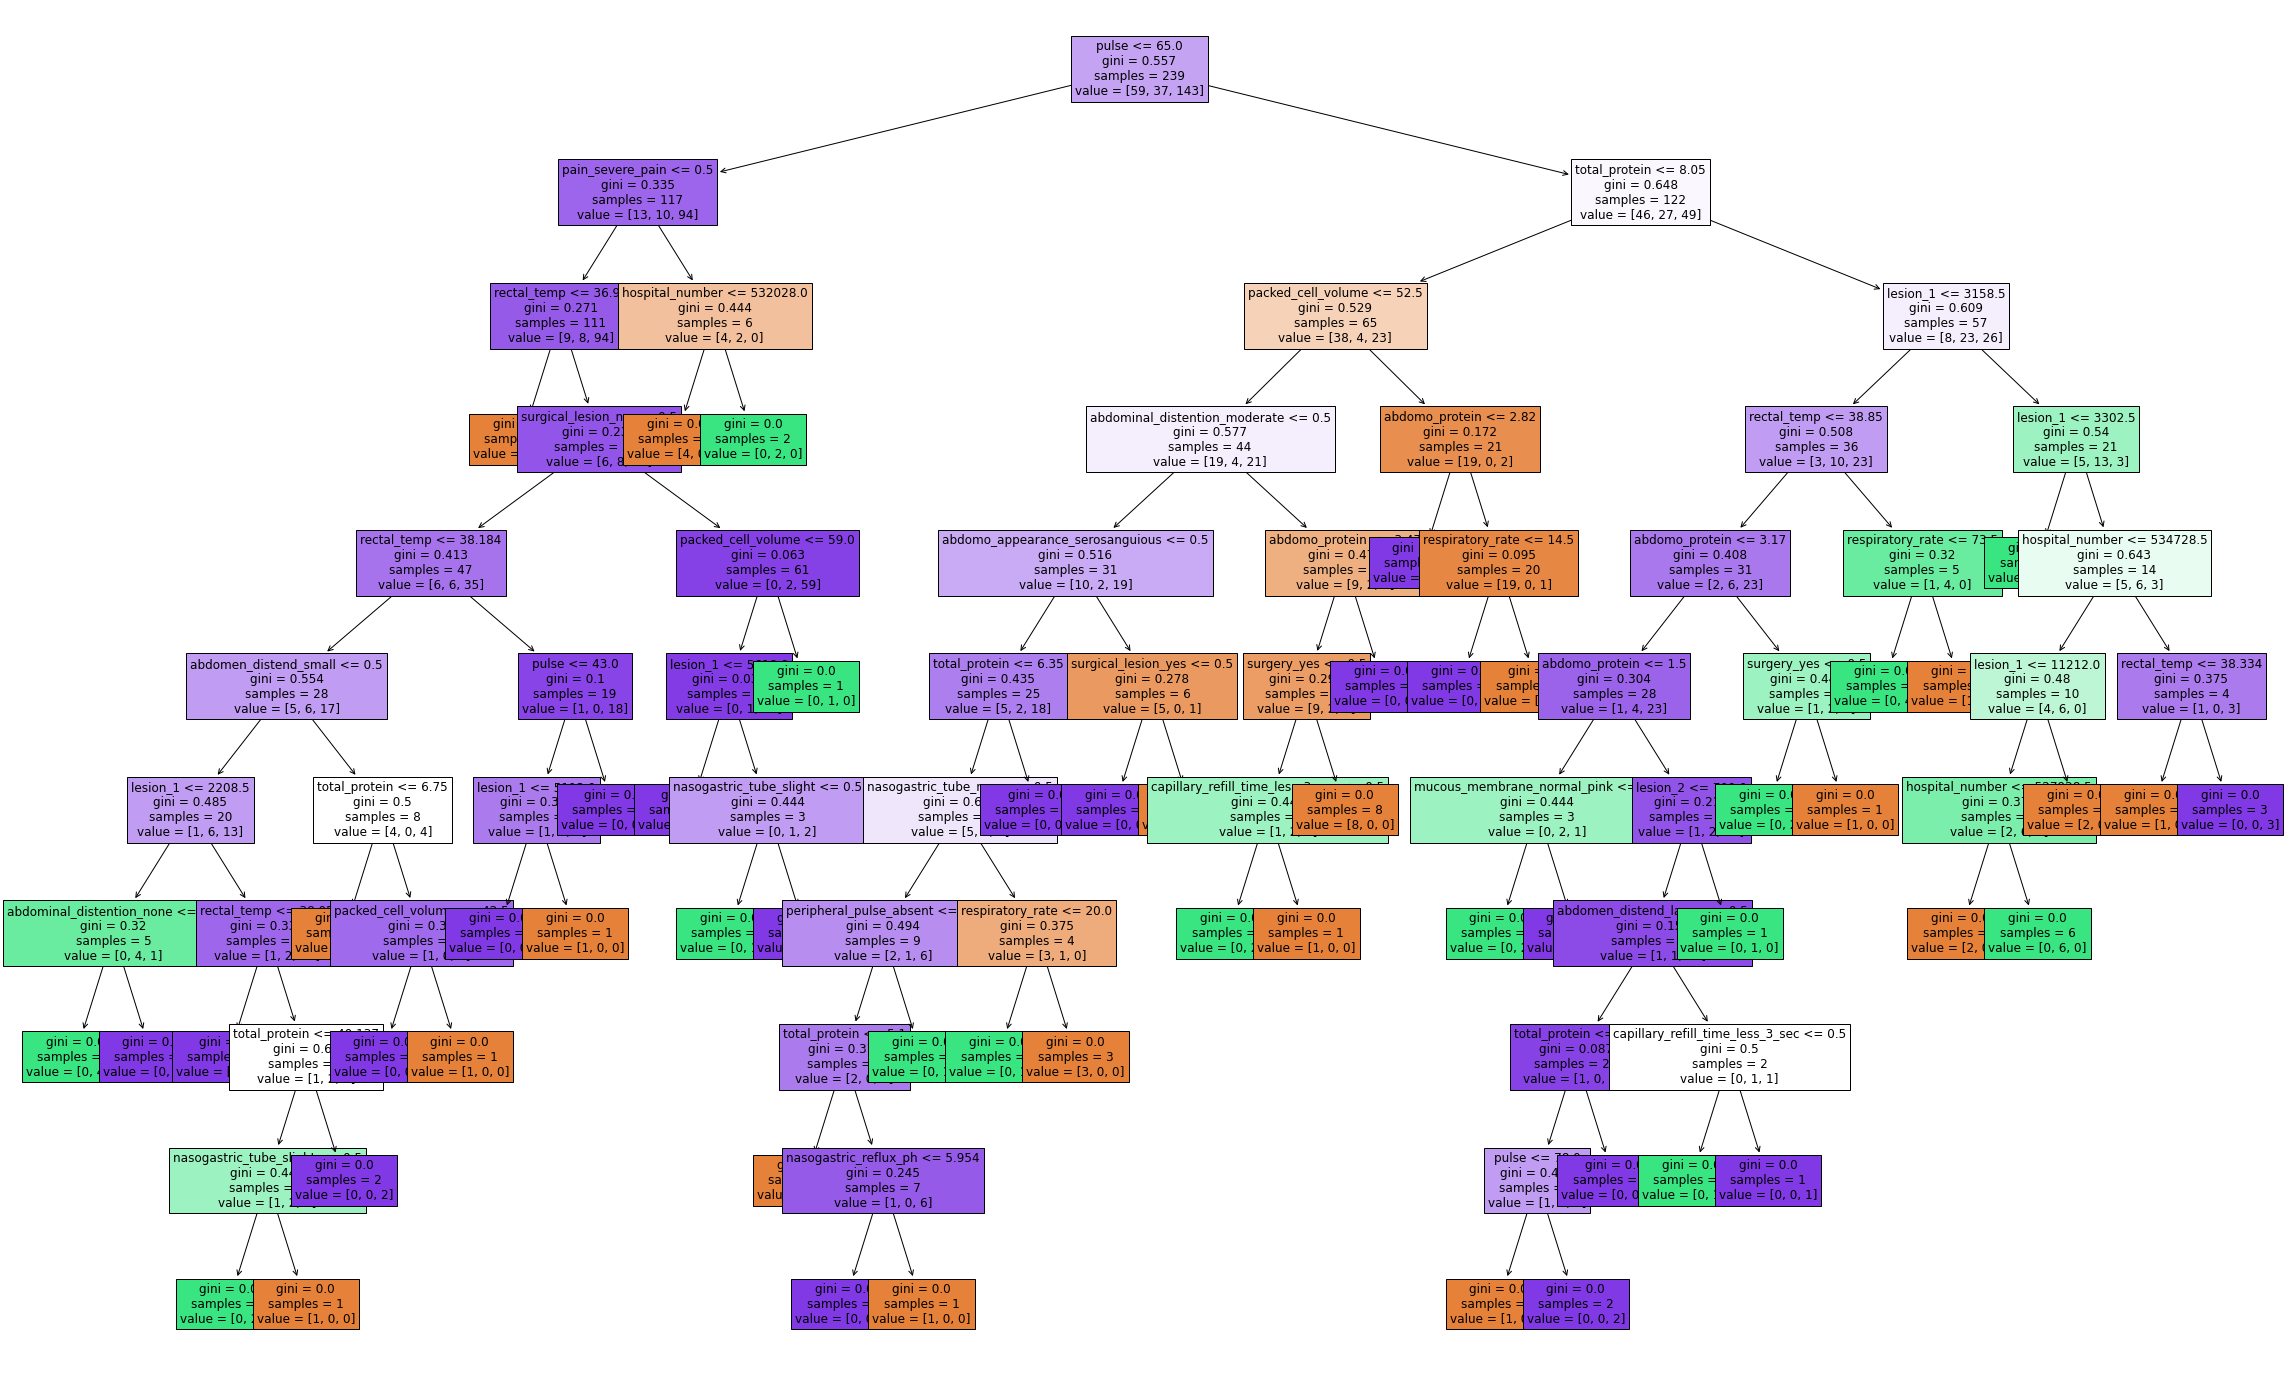

In [24]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(dt,feature_names=finaldata.columns,filled=True,fontsize=12)
plt.show()

In [25]:
from sklearn.metrics import classification_report,accuracy_score
print("The train data accuracy of the DT model is ",accuracy_score(y_train , ypredtrain))

The train data accuracy of the DT model is  1.0


# Testing Performance

In [26]:
ypredtest=dt.predict(X_test)

In [27]:
print("The test data accuracy of the DT model is ",accuracy_score(y_test , ypredtest))

The test data accuracy of the DT model is  0.5666666666666667


In [28]:
print(classification_report(y_test,ypredtest))

              precision    recall  f1-score   support

           0       0.47      0.50      0.49        18
           1       0.14      0.29      0.19         7
           2       0.85      0.66      0.74        35

    accuracy                           0.57        60
   macro avg       0.49      0.48      0.47        60
weighted avg       0.66      0.57      0.60        60



In [29]:
print("The depth of the DT model before pruning is :")
print(dt.get_depth())

The depth of the DT model before pruning is :
10


# Pruning the DT model to avoid overfitting


In [30]:
dtp=DecisionTreeClassifier(max_depth=5)
dtp.fit(X_train,y_train)
ypredtrain=dtp.predict(X_train)

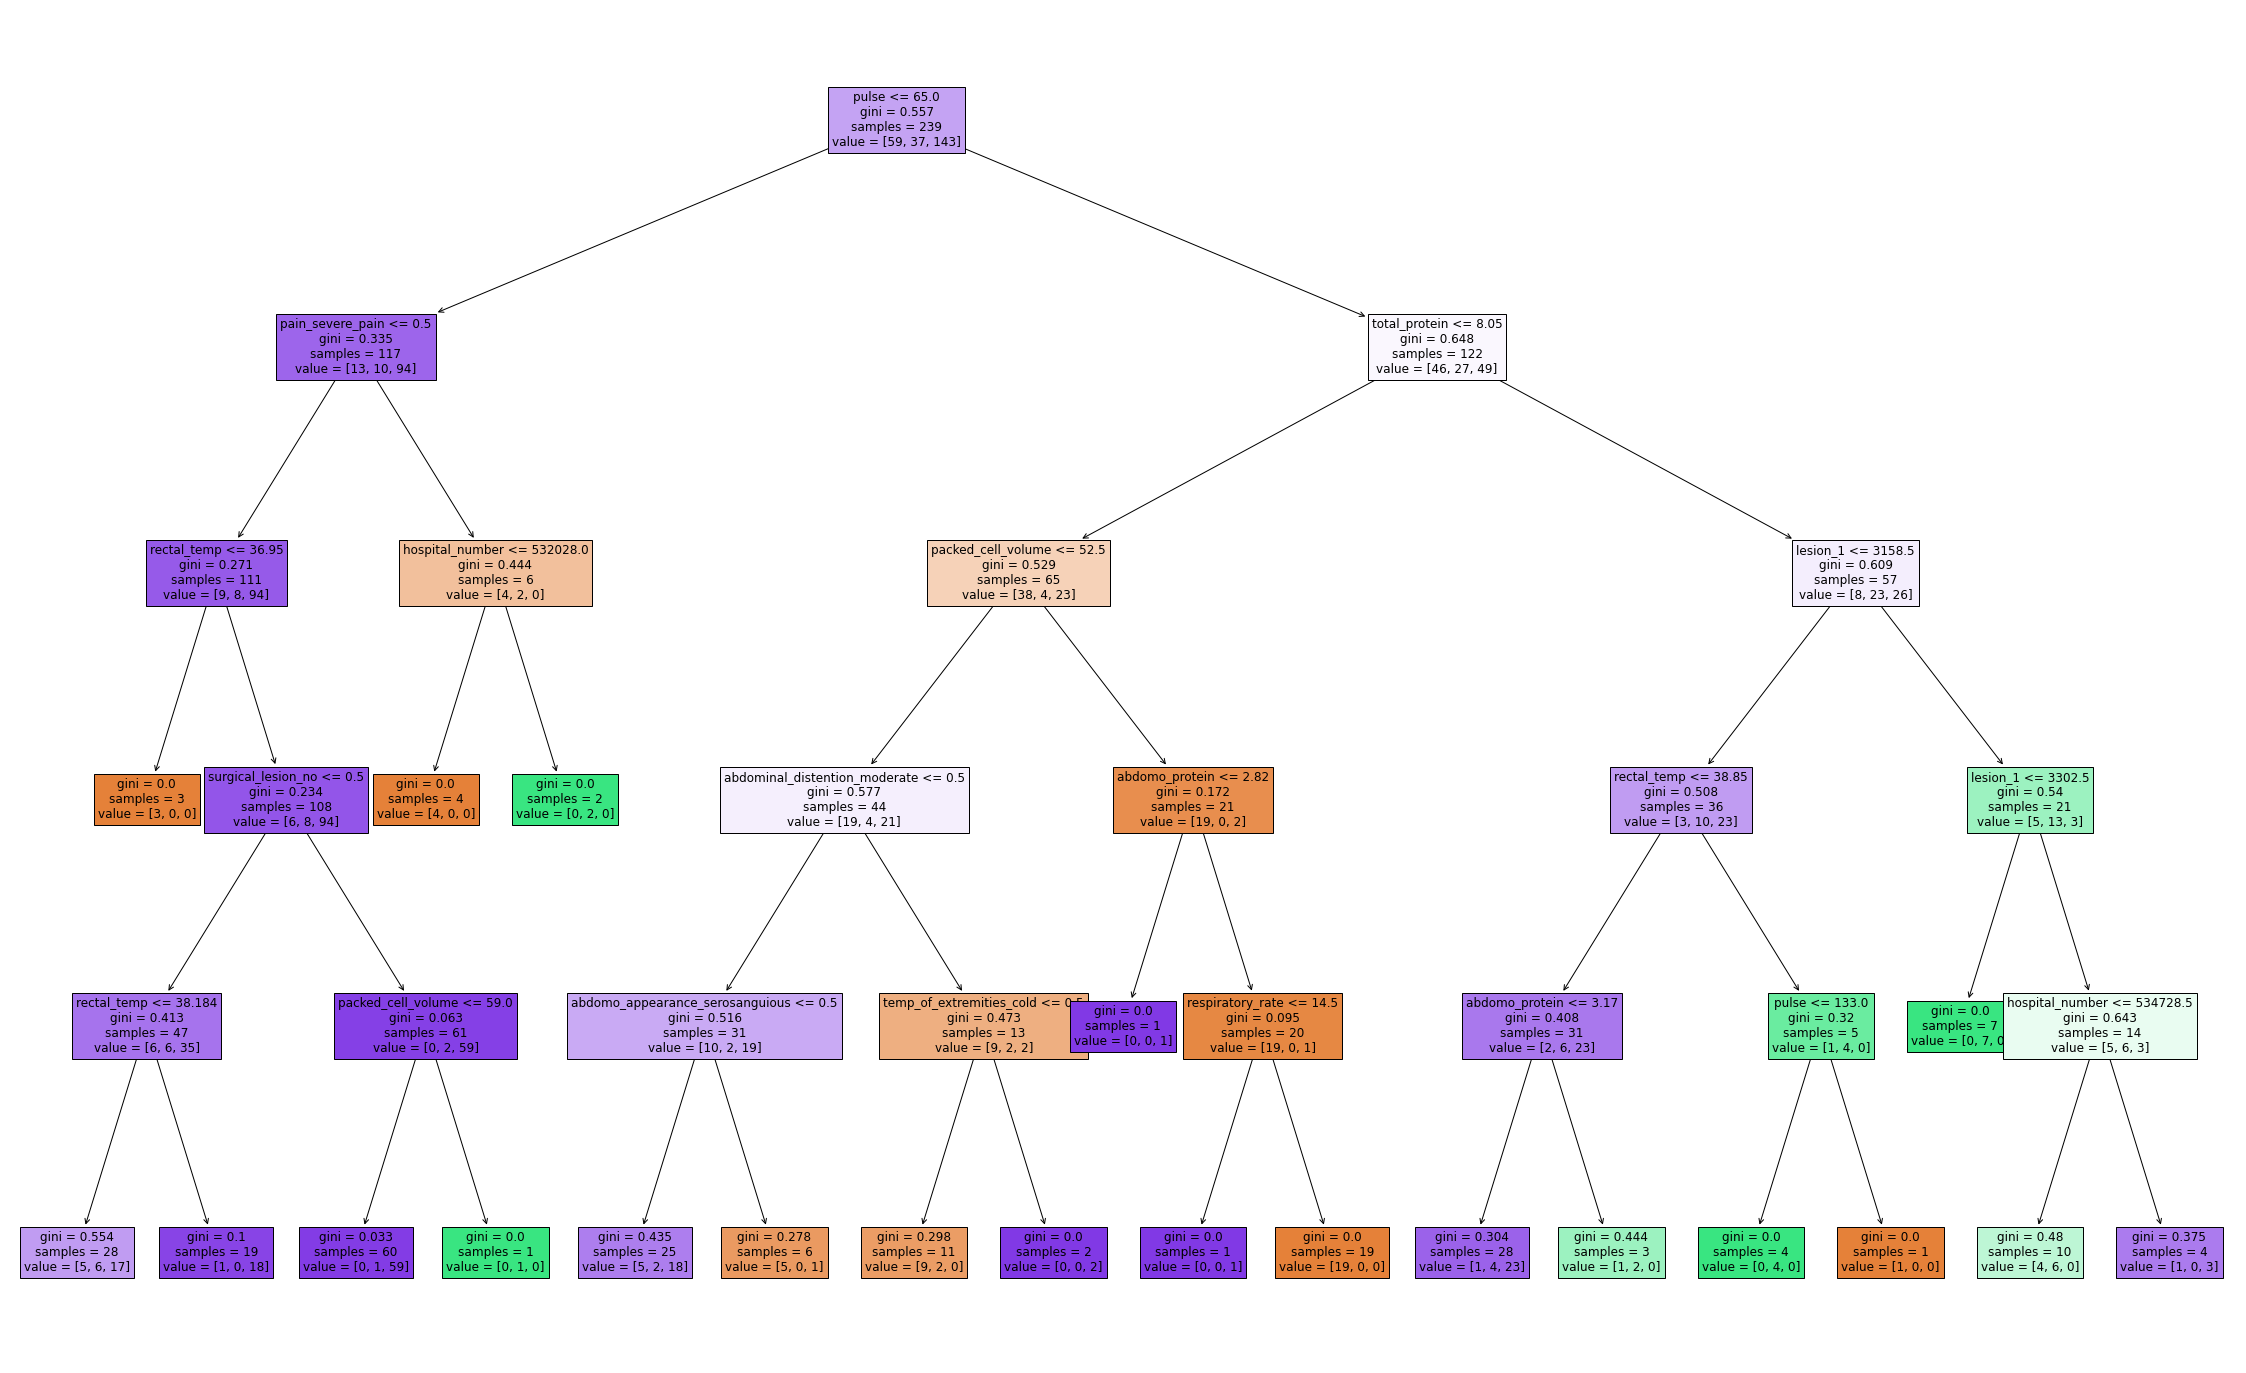

In [31]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(dtp,feature_names=finaldata.columns,filled=True,fontsize=12)
plt.show()

In [32]:
from sklearn.metrics import classification_report,accuracy_score
print("The train data accuracy of the DT model is ",accuracy_score(y_train , ypredtrain))

The train data accuracy of the DT model is  0.8577405857740585


In [33]:
ypredtest=dt.predict(X_test)

In [34]:
print("The test data accuracy of the DT model is ",accuracy_score(y_test , ypredtest))

The test data accuracy of the DT model is  0.5666666666666667


# End of Decison Tree

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=80)
rf.fit(X_train,y_train)
ypredtrain = rf.predict(X_train)

In [62]:
print('Training Accuracy: ', accuracy_score(y_train,ypredtrain))

Training Accuracy:  1.0


In [63]:
ypredtest = rf.predict(X_test)

In [66]:
print('The test accuracy: ',accuracy_score(y_test,ypredtest))

The test accuracy:  0.7833333333333333


In [70]:
#Building another model with different estimator
rf1 = RandomForestClassifier(n_estimators=160)
rf1.fit(X_train,y_train)
ypredtrain = rf1.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_train,ypredtrain))
ypredtest = rf1.predict(X_test)
print('The test accuracy: ',accuracy_score(y_test,ypredtest))

Training Accuracy:  1.0
The test accuracy:  0.7


In [69]:
#Building another model with different estimator
rf2 = RandomForestClassifier(n_estimators=120)
rf2.fit(X_train,y_train)
ypredtrain = rf2.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_train,ypredtrain))
ypredtest = rf2.predict(X_test)
print('The test accuracy: ',accuracy_score(y_test,ypredtest))

Training Accuracy:  1.0
The test accuracy:  0.7333333333333333


In [71]:
#To understand the optimal value of no of estimators
for x in range(75,100):
    rfloop=RandomForestClassifier(n_estimators=x, random_state=5)
    rfloop.fit(X_train, y_train)
    ytestpred = rfloop.predict(X_test)
    print('The testing accuracy for ',x, ' is ', accuracy_score(y_test, ytestpred))

The testing accuracy for  75  is  0.7166666666666667
The testing accuracy for  76  is  0.7166666666666667
The testing accuracy for  77  is  0.7
The testing accuracy for  78  is  0.7
The testing accuracy for  79  is  0.7
The testing accuracy for  80  is  0.7166666666666667
The testing accuracy for  81  is  0.7166666666666667
The testing accuracy for  82  is  0.7166666666666667
The testing accuracy for  83  is  0.7166666666666667
The testing accuracy for  84  is  0.7166666666666667
The testing accuracy for  85  is  0.7166666666666667
The testing accuracy for  86  is  0.7166666666666667
The testing accuracy for  87  is  0.7166666666666667
The testing accuracy for  88  is  0.7
The testing accuracy for  89  is  0.7
The testing accuracy for  90  is  0.7
The testing accuracy for  91  is  0.7
The testing accuracy for  92  is  0.7
The testing accuracy for  93  is  0.7166666666666667
The testing accuracy for  94  is  0.7
The testing accuracy for  95  is  0.7
The testing accuracy for  96  is  0.7

In [72]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
#For taking maximum depth
for y in range(2,10):
    print(y,'--------------------')
    for x in range(75,100):
        rfloop=RandomForestClassifier(n_estimators=x, random_state=5, max_depth=y)
        rfloop.fit(X_train, y_train)
        ytestpred = rfloop.predict(X_test)
        print('The testing accuracy for ',x, ' is ', accuracy_score(y_test, ytestpred))
    

2 --------------------
The testing accuracy for  75  is  0.65
The testing accuracy for  76  is  0.65
The testing accuracy for  77  is  0.6333333333333333
The testing accuracy for  78  is  0.6333333333333333
The testing accuracy for  79  is  0.65
The testing accuracy for  80  is  0.65
The testing accuracy for  81  is  0.6333333333333333
The testing accuracy for  82  is  0.65
The testing accuracy for  83  is  0.6333333333333333
The testing accuracy for  84  is  0.6333333333333333
The testing accuracy for  85  is  0.6333333333333333
The testing accuracy for  86  is  0.6333333333333333
The testing accuracy for  87  is  0.6333333333333333
The testing accuracy for  88  is  0.6333333333333333
The testing accuracy for  89  is  0.6333333333333333
The testing accuracy for  90  is  0.6333333333333333
The testing accuracy for  91  is  0.6333333333333333
The testing accuracy for  92  is  0.6333333333333333
The testing accuracy for  93  is  0.6333333333333333
The testing accuracy for  94  is  0.6333

The testing accuracy for  88  is  0.7166666666666667
The testing accuracy for  89  is  0.7166666666666667
The testing accuracy for  90  is  0.7166666666666667
The testing accuracy for  91  is  0.7
The testing accuracy for  92  is  0.7333333333333333
The testing accuracy for  93  is  0.7166666666666667
The testing accuracy for  94  is  0.7166666666666667
The testing accuracy for  95  is  0.7333333333333333
The testing accuracy for  96  is  0.7166666666666667
The testing accuracy for  97  is  0.7333333333333333
The testing accuracy for  98  is  0.7166666666666667
The testing accuracy for  99  is  0.7166666666666667
9 --------------------
The testing accuracy for  75  is  0.7
The testing accuracy for  76  is  0.7
The testing accuracy for  77  is  0.7
The testing accuracy for  78  is  0.7166666666666667
The testing accuracy for  79  is  0.7166666666666667
The testing accuracy for  80  is  0.7333333333333333
The testing accuracy for  81  is  0.7166666666666667
The testing accuracy for  82  

In [74]:
rf2 = RandomForestClassifier(n_estimators=77,max_depth=3, random_state=5)
rf2.fit(X_train,y_train)
ypredtrain = rf2.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_train,ypredtrain))
ypredtest = rf2.predict(X_test)
print('The test accuracy: ',accuracy_score(y_test,ypredtest))

Training Accuracy:  0.7364016736401674
The test accuracy:  0.75


In [82]:
#GridSearchCV - Hyperparameter Tuning

tuned_parameter = [{'max_depth':range(2,10),'min_samples_split':range(2,10), 'max_leaf_nodes':range(1,10)}]
dttune = DecisionTreeClassifier(random_state=5)

from sklearn.model_selection import GridSearchCV
treegrid = GridSearchCV(estimator=dttune,param_grid=tuned_parameter, scoring='accuracy')
treegridmodel = treegrid.fit(X_train, y_train)

print('The best parameter is ', treegridmodel.best_params_,'\n')

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

The best parameter is  {'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2} 



In [80]:
print('The accuracy is ', treegridmodel.score(X_test, y_test))

The accuracy is  0.55
